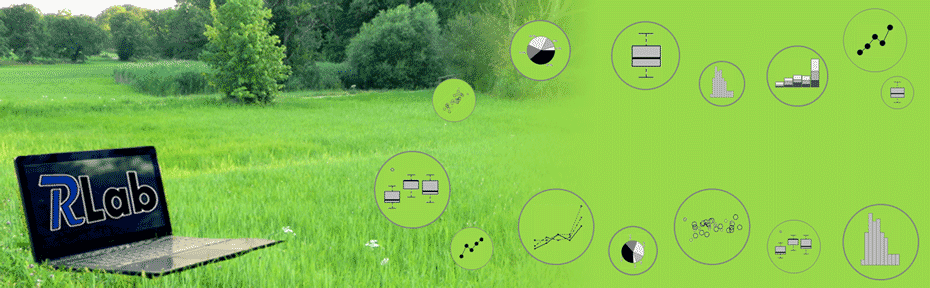
# Automatisierung in R
## Lösungsansätze für wiederholende Probleme und Fragestellungen

Sollte dies **das erste Mal** sein, dass Du mit einem **Jupyter Notebook** arbeitest, findest Du hier eine kleine Einführung dazu:

[Einführung in Jupyter Notebooks im RLab](https://rlab.blogs.uni-hamburg.de/dig-skripte/R_lernen_mit_RLab/index.html?s=R%20mit%20Jupyter%20direkt%20im%20Browser%20lernen)

Hier geht es auch wieder zurück zur **Homepage des** [RLab](https://rlab.blogs.uni-hamburg.de/ueber-rlab)

### Datensätze zur Visualisierung in R
Für alle nachfolgenden Beispiele verwenden wir den bereits in R integrierten Beispieldatensatz **iris()**

In [ ]:
head(iris) # Durch die head() Funktion werden nur die ersten 6 Zeilen des iris()-Datensatzes geladen

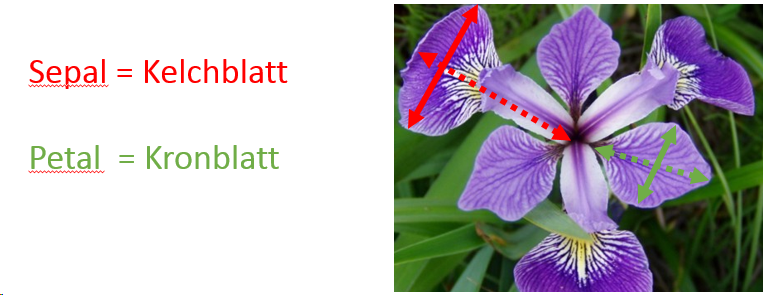

In [ ]:
?iris      # Beim Ausführen der Hilfe funktion '?' / help(iris) öffnet sich von unten ein Hilfefenster in Jupyter.
           # Dieses kann danach ohne Probleme wieder geschlossen werden.

### Funktionen auf mehrere Spalten / Zeilen anwenden

Im Nachfolgenden wollen wir für **mehrere Spalten und Reihen** das arithmetische Mittel berechnen. Zunächst soll dazu die Funktion **mean()** für alle numerischen Spalten (1-4) des iris-Datensatzes angewendet werden. Anstatt dieses **jedes Mal wieder neu zu schreiben** für jede Spalte...

In [ ]:
mean(iris$Sepal.Length)

In [ ]:
mean(iris$Sepal.Width)

In [ ]:
mean(iris$Petal.Length)

In [ ]:
mean(iris$Petal.Width)

... können wir auch die **Funktion colMeans()** verwenden.

In [ ]:
colMeans(iris[,1:4])

Analog **funktioniert** das ganze selbstverständlich **auch für Reihen**, obwohl das bei dem Beispieldatensatz von **iris()** nicht sonderlich sinnvoll ist, da wir nun über mehrere unterschiedliche Variablen (verschiedene Längen von Blütenblättern) einen Mittelwert bilden. Dies ist statistisch nicht sinnvoll!

In [ ]:
mean(iris[1:10,1]) # Mittelwert der Kelchblatt Länge der Art Setosa

In [ ]:
rowMeans(iris[1:10,1:2])

Wollen wir **nicht nur Spalten- oder Reihenmittel** berechnen, empfiehlt es sich die **apply() Funktion** zu verwenden. Diese können wir auch direkt Hilfe-Funktion aufrufen um die **Einstellungen für die Funktionsparameter** kennen zu lernen.

In [ ]:
?apply

 Als Input <b>X</b> für die Funktion ist mindestens **ein 2-dimensionaler Datensatz** erforderlich, wie z.B. eine **matrix()** oder ein **data.frame()**. Die **MARGIN** hat zwei Einstellungsmöglichkeiten:
 - '1' für Reihen
 - '2' für Spalten
 
Anschließend muss nur noch die **Funktion (FUN)**, z.B. **sd() für die Standardabweichung** übergeben werden.

In [ ]:
apply(iris[,-5], 2, sd) # ohne die Spalte 5, welche character-Werte enthält
                        # die auszuführende Funktion sd() wird einfach ohne Klammern mit ',' hinten angehängt

In [ ]:
apply(iris[,-5], 2, sd, na.rm = T) # weitere Funktionsparameter wie z.B. 'na.rm = T' können einfach mit ',' angehängt werden

Für **Reihen** müssen wir die **'2'** durch eine **'1'** tauschen, damit die **apply() Funktion richtig angewendet** wird. Wie schon vorher erwähnt ergeben die Auswertungen über die Reihen bei dem vorliegenden Datensatz keine wirklich sinnvollen Ergebnisse. Es geht hier primär um die Syntax in R.

In [ ]:
apply(iris[1:5,-5], 1, sd, na.rm = T) # Berechnet die Standardabweichung der ersten 5 Reihen jeweils über alle 4 Spalten 

Die **apply()** Funktion ermöglicht es Funktionen für den gesamten Datensatz anzuwenden und ersparrt uns viele Zeilen mit redundantem Code.

### Funktionen auf mehrere Datensätze anwenden

Was aber machen wir, wenn wir **Funktionen und Berechnungen** nicht nur auf 2-dimensionale Datensatz (Reihen x Spalten) sondern auf **mehrere Datensätze**, z.B. **dataframe()**s **anwenden** wollen?  
Hierbei helfen uns Schleifen bzw. Iterationen. Nachfolgend findest Du eine einfach **for-Schleife** (eng. for-loop) welche eine bestimmte Anzahl an Wiederholungen enthält. Diese Anzahl an Wiederholungen wird in R über den Vektor nach **in** definiert, in diesem Beispiel **10 Wiederholungen**, von 1 bis 10. Wir könnten in R auch kürzer schreiben:  
**for** (i **in** 1:10)

In [ ]:
x <- 0 # Ziel ist es auf die Zahl 0 in jedem Schritt + 1 zu addieren und das Ergebnis anzeigen zu lassen
for (i in c(1,2,3,4,5,6,7,8,9,10)) { # i gilt hier als Platzhalter für jedes Element im Vektor c(1,2,3,...,10)
    x <- x + 1                       # auf x wird in jedem Schritt + 1 addiert
    cat('\n', x)                     # cat gibt das ganze in R aus, das '\n' bewirkt, dass es in eine neue Zeile
                                     # geschrieben wird
}

Kompakter geschrieben:

In [ ]:
x <- 0 
for (i in 1:10) { 
    x <- x + 1
    cat('\n', x)
}

Diese einfache for-Schleife kann in RStudio auch mit dem Befehl **sys.Sleep(2)** erweitert werden. Dies führt dazu, dass R bei jeder Iteration (bei jedem Schritt einer Wiederholung in der Schleife) eine **kleine Pause von 2 Sekunden** einlegt. So kannst Du besser sehen, was R im Hintergrund macht und kannst **jeden Schritt (von 1 bis 10) nachvollziehen**. Probiere es doch einfach aus!  
Wollen wir nun **mit mehreren Datensätzen arbeiten**, müssen wir zunächst Beispieldatensätze erstellen. Die **rnorm() Funktion** liefert uns mit den folgenden Werten **25 standardnormalverteilte Zufallswerte**. Diese sind bei jeder Wiederholung unterschiedlich (deswegen auch 'Zufallswerte'). Die Zufallswerte wollen wir ein eine Matrix 'x' schreiben, welche aus 5 Spalten und 5 Reihen besteht.

In [ ]:
x <- matrix(rnorm(25,0,1), nrow = 5, ncol = 5, byrow = T)
x

Wir erstellen noch zwei weitere Matrizen **y und z**. Diese lassen wir uns ebenfalls anzeigen.

In [ ]:
y <- matrix(rnorm(25,0,1), nrow = 5, ncol = 5, byrow = T)
y

In [ ]:
z <- matrix(rnorm(25,0,1), nrow = 5, ncol = 5, byrow = T)
z

Nun haben wir 3 zufällig Beispieldatensätze mit denen wir die Schleifen und Automatisierungsprozesse etwas besser darstellen können. Als Beispielaufgabe sollen nun in jeder der 3 Matrizen Werte < 0 idenzifiziert werden und diese auf 'NA' gesetzt werden. 